## Importing Libraraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [2]:
df = pd.read_excel(r'C:\Kaggle\Projects\Minor Project\Stock Price Prediction.xlsx')

## Getting Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [4]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [5]:
df.shape

(1009, 7)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [8]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [9]:
df.astype

<bound method NDFrame.astype of            Date        Open        High         Low       Close   Adj Close  \
0    2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1    2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2    2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3    2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4    2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0 

## Fetching High Stocks

In [10]:
df['High'].unique()

array([267.899994, 266.700012, 272.450012, 267.619995, 255.800003,
       259.149994, 261.410004, 269.880005, 280.5     , 281.959991,
       285.809998, 286.640015, 284.5     , 286.      , 295.649994,
       297.359985, 295.75    , 295.25    , 301.179993, 316.910004,
       325.790009, 323.73999 , 322.920013, 331.440002, 333.980011,
       325.839996, 323.880005, 323.399994, 324.109985, 317.      ,
       319.5     , 319.399994, 314.119995, 309.369995, 321.029999,
       322.899994, 298.799988, 295.350006, 292.869995, 291.25    ,
       290.309998, 299.160004, 298.850006, 299.549988, 298.950012,
       311.640015, 311.130005, 317.48999 , 316.100006, 338.619995,
       338.820007, 335.309998, 336.51001 , 331.220001, 320.25    ,
       309.980011, 316.630005, 317.450012, 317.880005, 313.480011,
       317.100006, 312.589996, 320.980011, 329.019989, 327.350006,
       331.950012, 332.059998, 331.26001 , 330.5     , 326.940002,
       329.720001, 330.450012, 326.420013, 331.880005, 336.630

## Fething Low Stocks

In [11]:
df['Low'].unique()

array([250.029999, 245.      , 264.329987, 250.      , 236.110001,
       249.      , 254.699997, 260.329987, 267.630005, 275.690002,
       276.609985, 280.01001 , 274.450012, 277.809998, 287.01001 ,
       290.589996, 290.779999, 283.829987, 283.230011, 297.600006,
       316.5     , 314.549988, 314.130005, 320.230011, 318.600006,
       313.279999, 317.700012, 318.140015, 318.369995, 307.339996,
       312.799988, 314.51001 , 305.660004, 300.359985, 302.      ,
       297.      , 281.609985, 275.899994, 275.049988, 278.01001 ,
       271.220001, 289.109985, 285.649994, 289.119995, 291.690002,
       301.820007, 306.75    , 308.230011, 304.      , 323.769989,
       331.100006, 326.769989, 326.      , 317.079987, 302.309998,
       292.619995, 305.579987, 306.5     , 310.119995, 306.690002,
       310.399994, 305.730011, 307.670013, 319.339996, 323.049988,
       327.51001 , 327.339996, 324.869995, 327.040009, 322.429993,
       325.140015, 323.170013, 322.799988, 325.450012, 331.149

## Handling Null Values

In [12]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Visualization

In [13]:
df = pd.read_excel(r'C:\Kaggle\Projects\Minor Project\Stock Price Prediction.xlsx', index_col='Date', parse_dates=True)

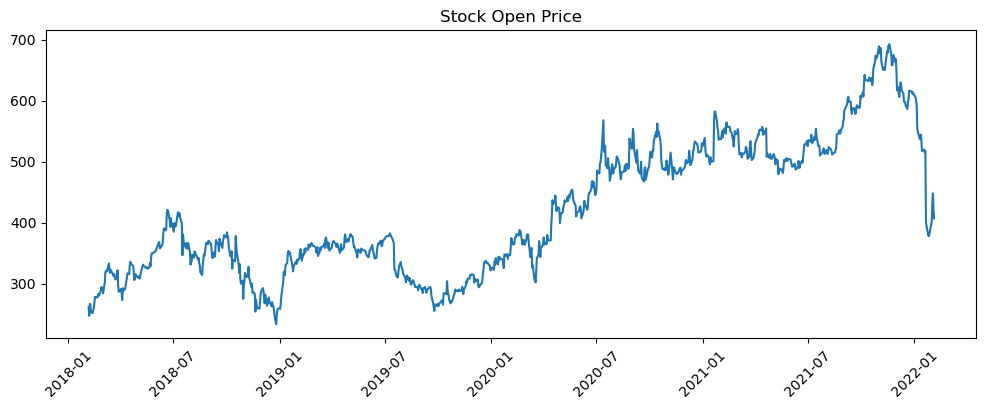

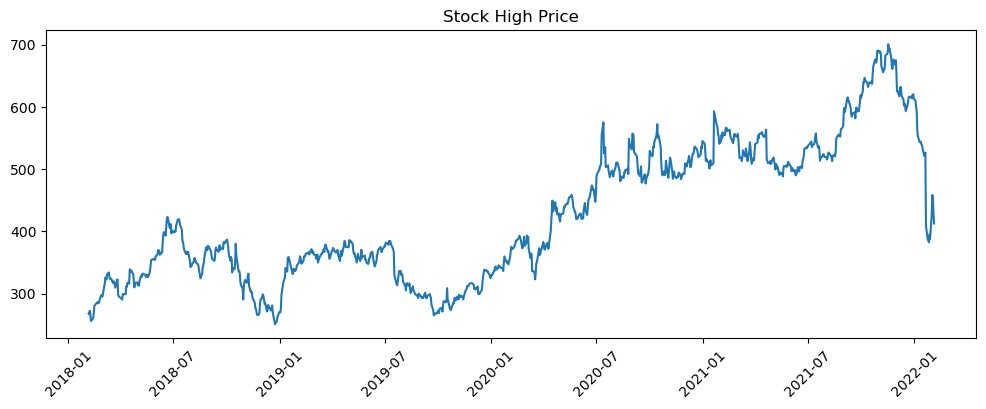

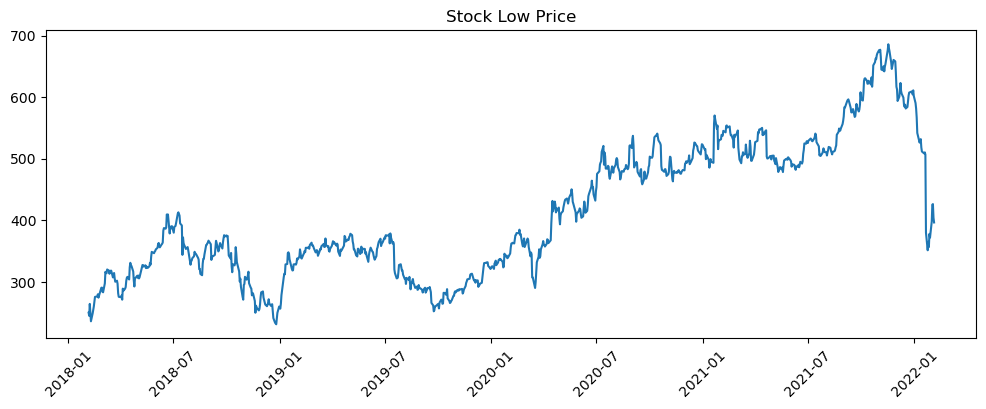

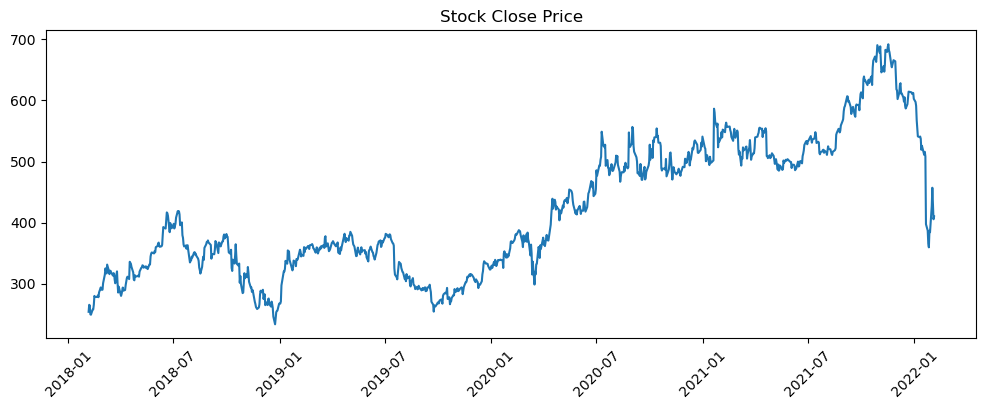

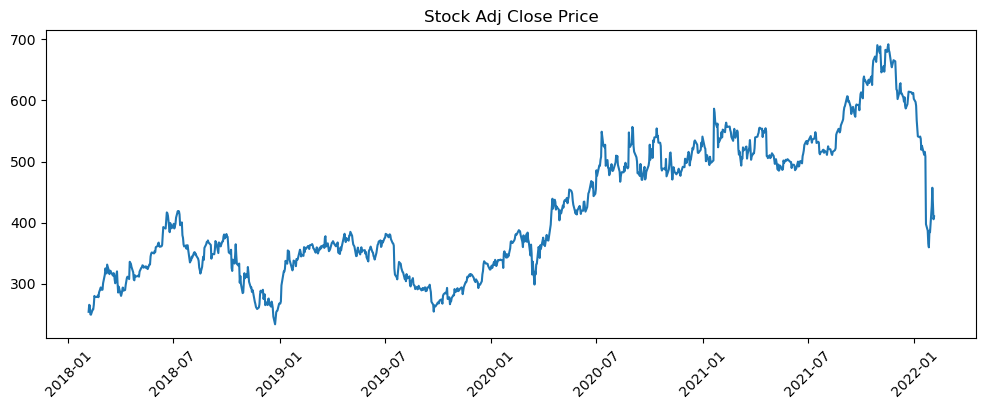

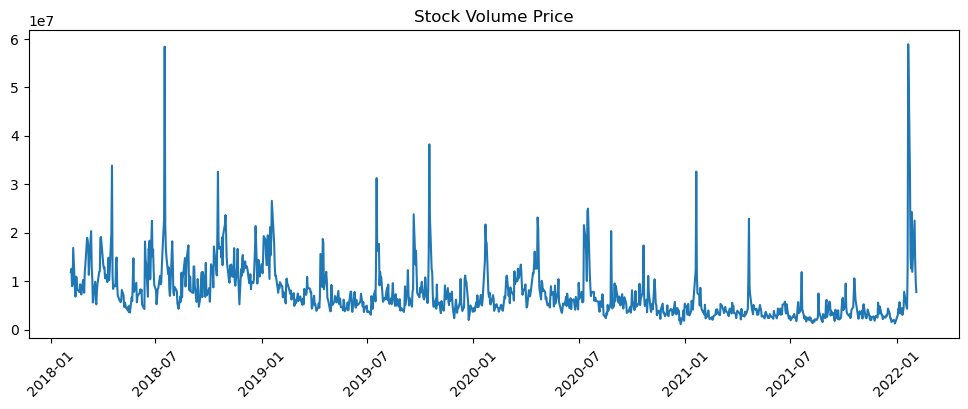

In [14]:
for columns in df.columns:
    plt.figure(figsize=(12,4))
    plt.title(f"Stock {columns} Price")
    plt.plot(df.index,df[columns])
    plt.xticks(rotation=45)

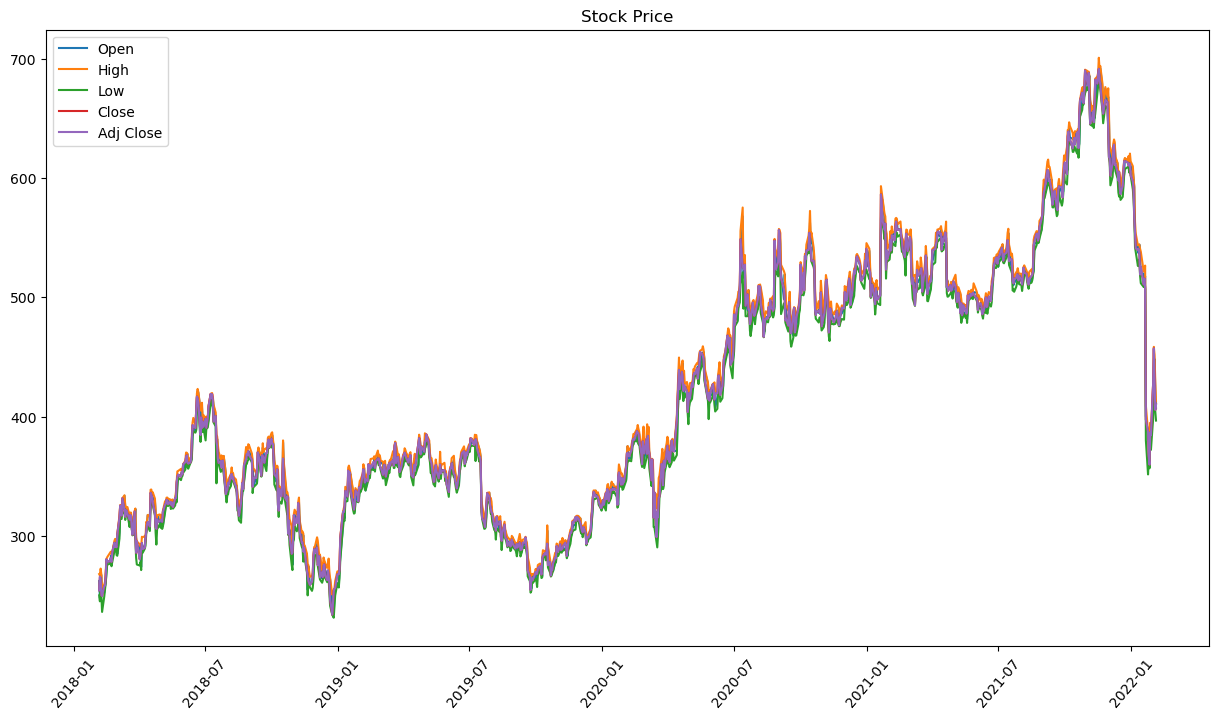

In [15]:
plt.figure(figsize=(15, 8))
plt.title("Stock Price")
for columns in df.columns:
    if(columns !='Volume'):
        plt.plot(df.index,df[columns],label=columns)
plt.xticks(rotation=50)
plt.legend()

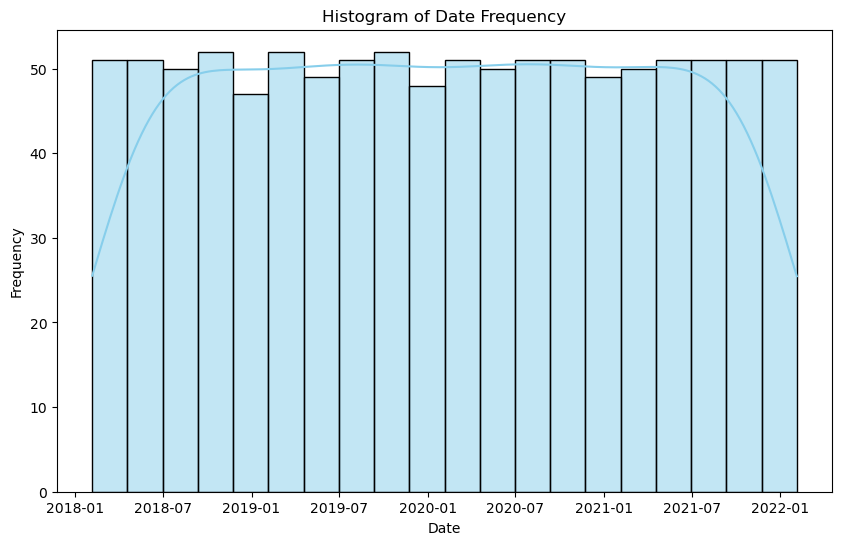

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Date', bins=20, kde=True, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Date Frequency')
plt.show()

<Axes: ylabel='Date'>

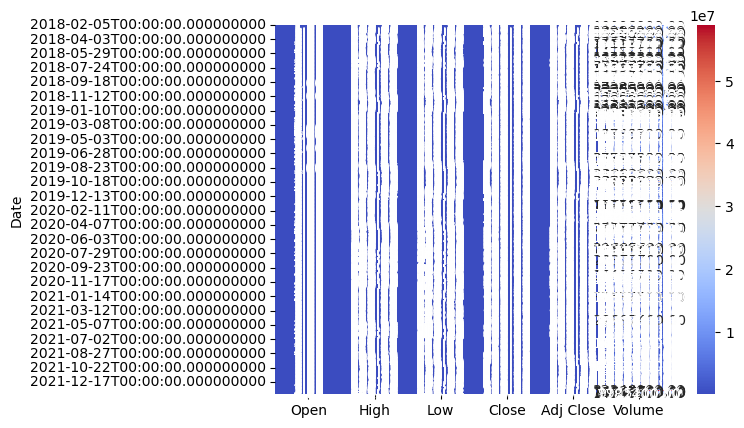

In [17]:
frequency_map = df['Open'].value_counts().to_dict()
df['Open'] = df['Open'].map(frequency_map)
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: ylabel='Date'>

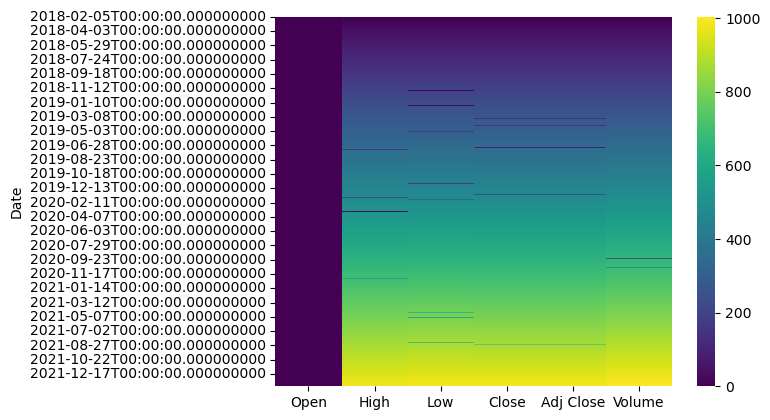

In [18]:
sns.heatmap(df.apply(lambda x: pd.factorize(x)[0]), cmap='viridis', annot=False)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

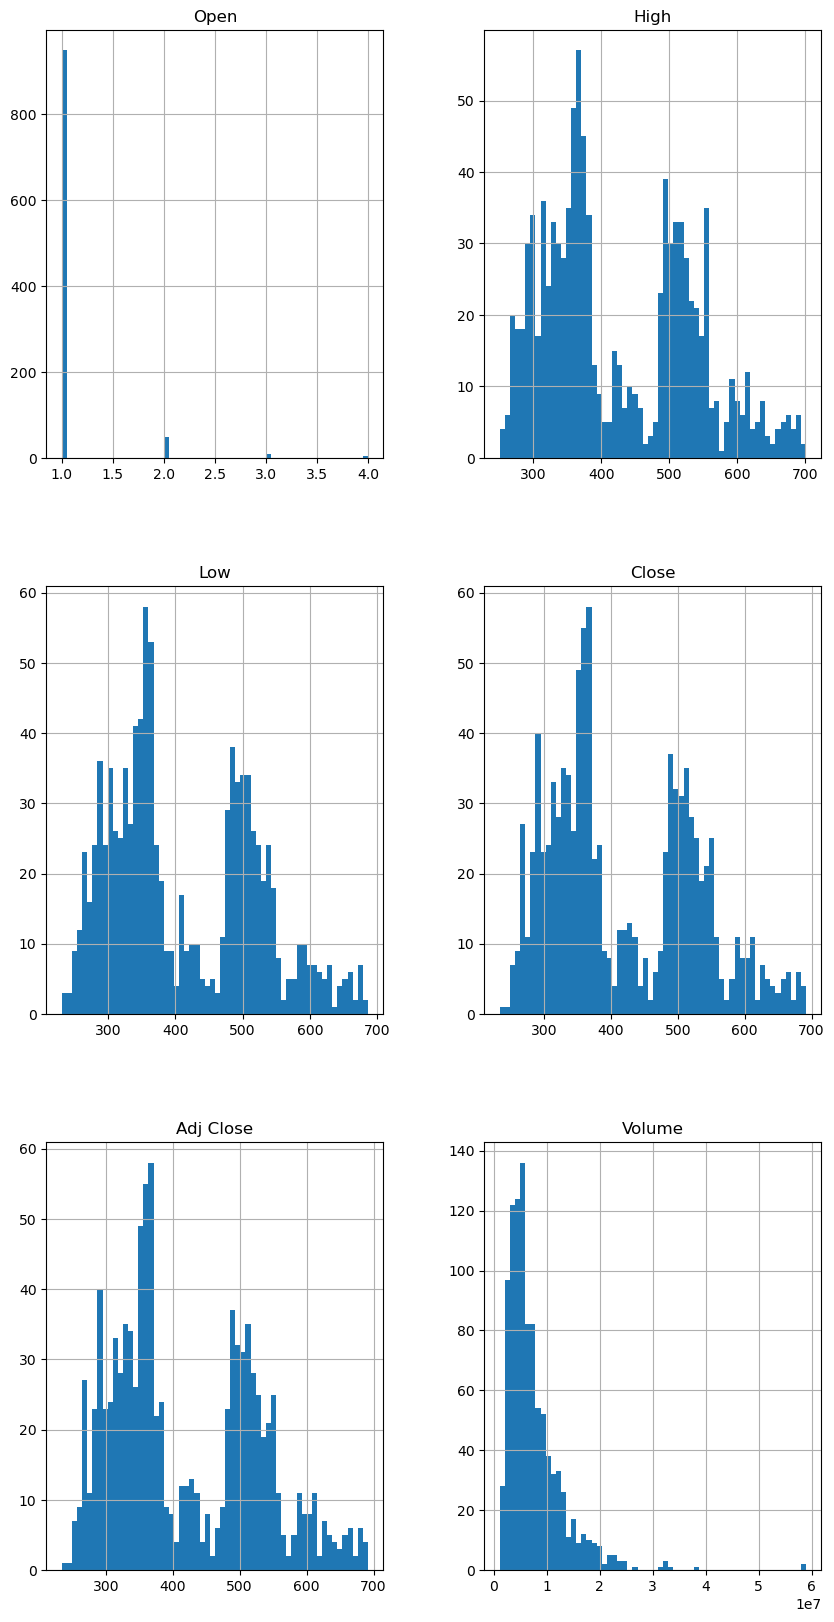

In [19]:
df.hist(bins=60,figsize=(10,20))

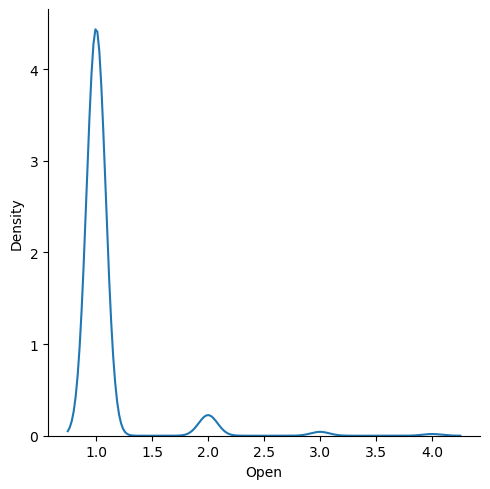

In [20]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Adj Close', ylabel='High'>

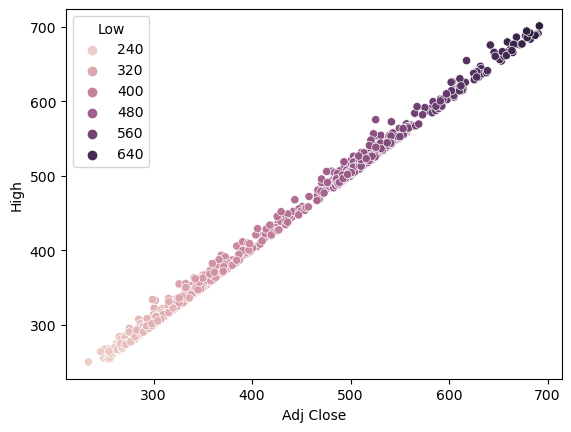

In [21]:
sns.scatterplot(x="Adj Close",y="High",hue="Low",data=df)

## Normalization

In [22]:
df=df['Close']
df.shape

(1009,)

In [23]:
df

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2022-01-31    427.140015
2022-02-01    457.130005
2022-02-02    429.480011
2022-02-03    405.600006
2022-02-04    410.170013
Name: Close, Length: 1009, dtype: float64

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [25]:
df=scaler.fit_transform(np.array(df).reshape([df.shape[0],1]))

## Converting Array Values into dataset values

In [26]:
def create_seq(df,time_step=60):
    X=[]
    y=[]
    for i in range(len(df)-time_step-1):
        X.append(df[i:(i+time_step)])
        y.append(df[i+time_step])
    return X,y

In [27]:
time_step=100
X,y=create_seq(df,time_step)

In [28]:
len(X),len(y)

(908, 908)

In [29]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)

In [30]:
X.shape,y.shape

((908, 100, 1), (908, 1))

## Splitting Data

In [31]:
X_train,X_test,y_train,y_test=X[:int(df.shape[0]*0.8)],X[int(df.shape[0]*0.8):],y[:int(df.shape[0]*0.8)],y[int(df.shape[0]*0.8):]

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((807, 100, 1), (101, 100, 1), (807, 1), (101, 1))

## Buliding Model

In [33]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import tensorflow as tf
from tensorflow import keras
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=X_train[0].shape))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,929 (503.63 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [34]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0824 - root_mean_squared_error: 0.2745
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0029 - root_mean_squared_error: 0.0533
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0023 - root_mean_squared

## Testing the Model

In [35]:
trainPred=model.predict(X_train)
testPred=model.predict(X_test)
trainPred=scaler.inverse_transform(trainPred)
testPred=scaler.inverse_transform(testPred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


## Model Performance

In [36]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.0405


[0.0022790697403252125, 0.043592434376478195]

## Plotting performance

In [37]:
look_back=time_step

trainPredPlot=np.empty_like(scaler.inverse_transform(df))
trainPredPlot[:]=np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred

testPredPlot=np.empty_like(scaler.inverse_transform(df))
testPredPlot[:]=np.nan
testPredPlot[len(trainPred)+look_back:len(trainPred)+look_back+len(testPred)]=testPred

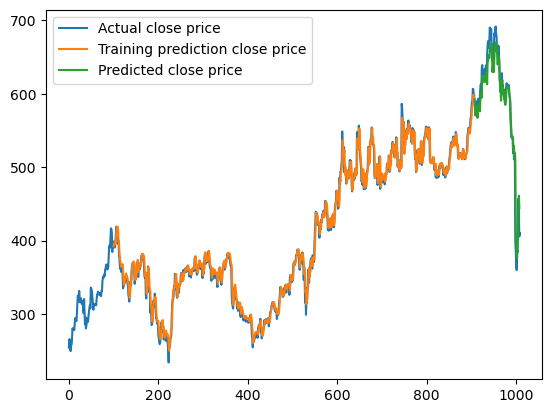

In [38]:
plt.plot(scaler.inverse_transform(df),label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

## Next 90 days prediction

In [39]:
predection_df=np.array(df[-time_step:])
predection_df=predection_df.reshape([predection_df.shape[0],1])

In [40]:
def predication(data,days=30):
    data=scaler.transform(data)
    pred=[]
    for i in range(1,days+1):
        nxt_day=model.predict([data],verbose=0)
        pred.append(scaler.inverse_transform(nxt_day)[0])
        data[:-1]=data[1:]
        data[-1]=nxt_day[0]
    return np.array(pred).squeeze()

In [43]:
days=90
res=predication(predection_df,days)

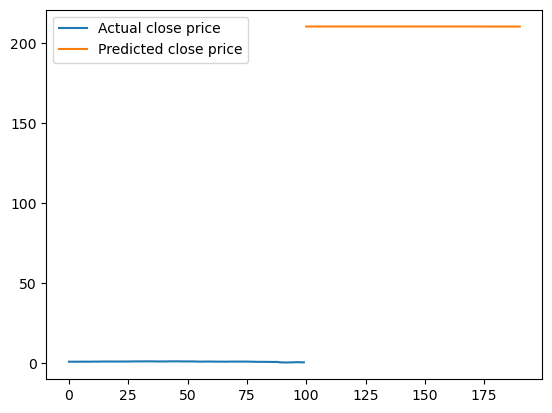

In [44]:
trainPredPlot=np.zeros(shape=[len(predection_df)+1+days])
trainPredPlot[:]=np.nan
trainPredPlot[len(predection_df)]=res[-1]
trainPredPlot[len(predection_df)+1:]=res
df_=predection_df
plt.plot(df_,label="Actual close price")
plt.plot(trainPredPlot,label="Predicted close price")
plt.legend()
plt.show()
